In [1]:
%matplotlib inline

from modsim import *
import numpy as np

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
N = UNITS.newton

In [3]:
condition = Condition(height = 381 * m,
                      v_init = 0 * m / s,
                      g = 9.8 * m/s**2,
                      mass = 75 * kg,
                      rho = 1.2 * kg/m**3,
                      v_term = 1 * m / s,
                      duration = 1800* s)

In [4]:
def final_state(results):
    """Returns the final position and velocity, with units.
    
    results: TimeFrame with y and v.
    
    returns: y, v at t_end
    """
    t_end = results.index[-1]
    y, v = results.loc[t_end]
    return y*m, v*m/s

In [5]:
def make_system(condition, area):
    """Makes a System object for the given conditions.
    
    condition: Condition with height, g, mass, diameter, 
               rho, v_term, and duration
    
    returns: System with init, g, mass, rho, C_d, area, and ts
    """
    unpack(condition)
    init = State(y=height, v=v_init)
    C_d = 1*m**0
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, rho=rho,
                  C_d=C_d, area=area,
                  y_attach=height, ts=ts)

In [6]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """

    y, v = state
    unpack(system)
#     print(area)
    f_drag = rho * v**2 * C_d * area / 2
    a_drag = f_drag / mass
#     print(f_drag)
    
    dydt = v
    dvdt = -g + a_drag
    return dydt, dvdt

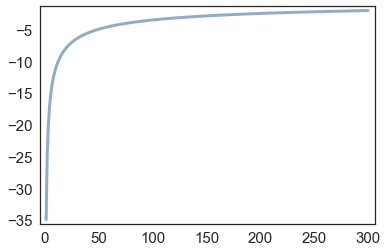

In [38]:
areas = linspace(1,300,300)
mylist=[]
for area in areas:
    area = area * m **2
    condition.set(duration=1800*s)
    system= make_system(condition, area)
    slope_func(system.init, 0, system)
    run_odeint(system, slope_func)
    y_final,v_final = final_state(system.results)
    
    T = interp_inverse(system.results.y,kind='cubic')
    ground=T(0)
    condition.set(duration=ground*s)
    
    system = make_system(condition, area)
    slope_func(system.init, 0, system)
    run_odeint(system, slope_func)
    y_final, v_final = final_state(system.results)
    mylist.append(v_final.magnitude)
plot(areas,mylist)